In [2]:
from google.colab import files
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

mythingzz = files.upload()


Saving shopping_trends - shopping_trends.csv to shopping_trends - shopping_trends.csv


In [3]:
dataframe = pd.read_csv('shopping_trends - shopping_trends.csv')


dataframe

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd # Import pandas again just in case
from sklearn.preprocessing import StandardScaler


le = LabelEncoder()
defz = dataframe['Purchase Amount (USD)']
defz1 = dataframe['Previous Purchases']


hatodg = pd.Series(le.fit_transform(dataframe['Season']), name='Season_encoded')
hatdog2 = pd.Series(le.fit_transform(dataframe['Location']), name='Location_encoded')
hatdog3 = pd.Series(le.fit_transform(dataframe['Item Purchased']), name='Item Purchased_encoded')
hatdog4 = pd.Series(le.fit_transform(dataframe['Frequency of Purchases']), name='Frequency of Purchases_encoded')





X = pd.concat([defz, defz1, hatodg, hatdog2, hatdog3, hatdog4], axis=1)
y= le.fit_transform(dataframe['Season'])

logistics = LogisticRegression()

X_train , X_test , y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


train = logistics.fit(X_train_scaled,y_train)
predict = logistics.predict(X_test_scaled)
accuracy = accuracy_score(y_test,predict)
print(predict)
print("accuracy", accuracy)

[1 2 2 3 0 1 1 0 0 0 0 0 1 1 0 2 1 3 3 3 0 0 2 3 3 3 1 1 1 2 1 0 2 2 3 0 2
 2 2 3 0 2 2 1 1 2 3 0 2 1 3 0 0 0 2 2 1 3 2 2 3 1 3 1 0 3 0 1 0 1 1 0 1 0
 0 0 3 2 2 2 0 0 3 0 3 1 0 3 1 3 3 0 2 1 2 2 2 2 1 2 0 1 0 2 0 1 0 3 0 3 2
 0 1 1 2 1 0 1 2 1 0 1 1 0 0 0 3 0 2 1 1 2 2 3 1 0 0 2 0 2 2 1 2 2 1 1 0 1
 3 0 2 0 3 2 3 1 1 2 0 0 3 3 3 1 3 3 3 3 0 2 1 2 2 3 3 2 1 3 0 3 3 0 0 1 2
 0 1 0 0 1 1 2 0 2 3 3 1 1 1 3 1 2 1 2 1 0 0 0 0 3 0 0 2 1 2 1 0 1 1 0 1 0
 0 3 2 3 3 3 0 0 1 0 2 2 0 1 2 1 2 3 0 3 2 3 0 0 2 3 1 2 3 3 1 1 2 2 3 3 3
 1 2 1 0 1 2 0 3 0 0 0 3 1 3 0 3 2 2 0 2 1 2 0 3 2 0 1 2 2 2 3 0 2 2 0 0 3
 0 2 3 1 3 2 2 2 2 0 0 3 0 0 3 3 2 0 0 3 0 3 2 1 3 2 0 3 0 3 0 0 1 0 3 3 2
 2 3 0 3 1 3 0 0 2 3 3 1 0 0 3 2 3 0 1 0 2 3 0 1 1 2 0 0 0 0 1 2 1 2 1 0 2
 0 1 1 0 0 3 0 1 1 0 3 0 2 3 2 2 1 3 1 2 2 0 1 0 2 3 1 1 2 2 2 0 1 2 2 1 0
 1 2 0 1 0 1 2 2 3 0 2 0 2 3 0 2 1 1 2 2 2 1 3 2 0 1 3 2 0 2 1 0 0 3 0 0 3
 2 3 1 2 0 0 3 3 1 3 3 1 2 1 2 2 1 3 1 1 1 0 0 2 0 2 3 2 0 1 1 3 3 3 3 3 3
 1 3 1 1 0 3 3 1 2 3 2 1 

In [41]:

mapanahon_items = dataframe.groupby(['Season', 'Item Purchased']).size().unstack(fill_value=0)

print("Top items purchased in each season:")
for season in mapanahon_items.index:
    top_items = mapanahon_items.loc[season].sort_values(ascending=False).head(5)
    print(f"\n{season}:")
    print(top_items)

Top items purchased in each season:

Fall:
Item Purchased
Jacket     54
Hat        50
Handbag    48
Skirt      46
Sandals    44
Name: Fall, dtype: int64

Spring:
Item Purchased
Sweater    52
Shorts     47
Skirt      46
Coat       46
Blouse     46
Name: Spring, dtype: int64

Summer:
Item Purchased
Pants       50
Jewelry     47
Dress       47
Shoes       46
Backpack    45
Name: Summer, dtype: int64

Winter:
Item Purchased
Sunglasses    52
Pants         51
Shirt         50
Hoodie        48
Jewelry       47
Name: Winter, dtype: int64


ValueError: keyword ha is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

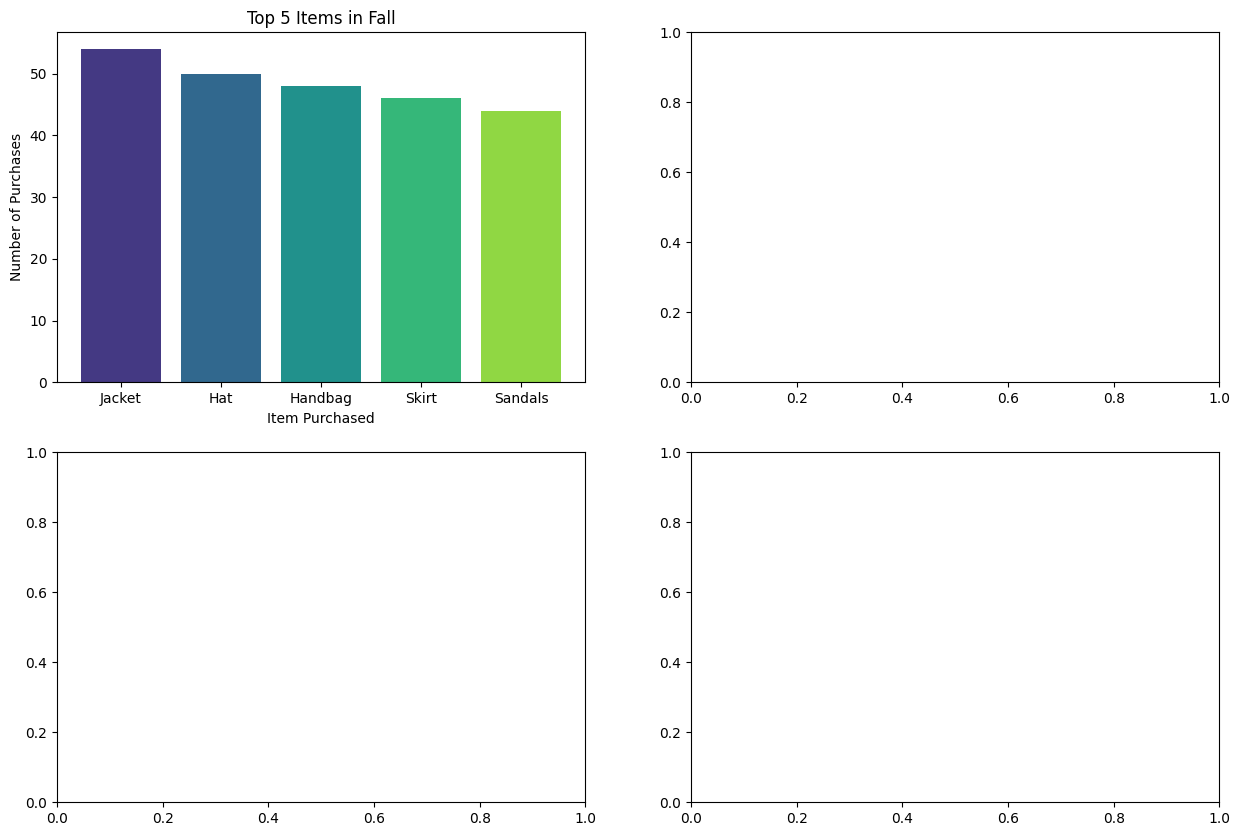

In [43]:


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, season in enumerate(mapanahon_items.index):
    top_items = mapanahon_items.loc[season].sort_values(ascending=False).head(5)
    axes[i].bar(top_items.index, top_items.values, color=sns.color_palette("viridis", len(top_items)))
    axes[i].set_title(f'Top 5 Items in {season}')
    axes[i].set_xlabel('Item Purchased')
    axes[i].set_ylabel('Number of Purchases')
    axes[i].tick_params(axis='x', rotation=45, ha='right')

plt.tight_layout()
plt.show()